<a href="https://colab.research.google.com/github/kimjuju123/Hi/blob/master/HalflifeLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining Decay Constants with Dice

### Hyuk-Joong Kim Seeman and Liana Adames
### Instructor Theresa Grimaldi
### 2/24/26
### Radiochemistry

### Purpose

The purpose of this lab was to determine decay constants by taking advantage of the unpredictable nature of casting dice and systematically removing them from the sample set. From probability theory, casting enough fair dice yields a one-in-six chance of landing on a particular face. Therefore, the probability of rolling a larger set of marked faces increases to n-in-six outcomes, where n is the number of faces chosen to be removed from the active set. It is predicted that the decay constant and the probability of removal for an individual die have a direct causual link and therefore can be used to simulate half life mechanics.

### Experiment 1



The experiment utilizes two datasets, Curie and Barn, to simulate varying rates of stochastic decay using 30 simultaneous dice tosses. In the Curie set ($p=2/3$), dice are removed on values 1 through 4; in the Barn set ($p=1/6$), only the value 1 results in removal. Where $p$ represents the success of removal from the sample set. We hypothesize that the 'lifespan' of an individual die follows a Geometric Distribution:$$P(X=k) = p(1-p)^{k-1}$$where $k$ represents the specific round of removal. Consequently, the aggregate sample size $n$ is expected to exhibit exponential decay. Since the dice are independent, the number of dice removed in any single round $t$ follows a Binomial Distribution:$$P(K=k \mid n_t) = \binom{n_t}{k} p^k (1-p)^{n_t-k}$$where $n_t$ is the number of dice remaining at the start of the round. This framework allows for a robust qualitative comparison between experimental decay rates and theoretical models.

While these distributions model the discrete mechanics of each round, the overarching decay is best analyzed by mapping the discrete probability $p$ to the continuous decay constant $b$. By following the exponential decay model derived using calculus:
$$A(t)=A_0e^{bt}$$

we can compare the logarithmic decay rate b in the continuous world to the discrete probability of the die cast. That is by comparing

 $e^{bt}$ = $(1-p)^t$ then:

$$b=ln(1-p)$$

,Number of Rolls,Total - Discarded (Value = {1})
0,1.0,6
1,2.0,6
2,3.0,3
3,4.0,1
4,5.0,4
5,6.0,0
6,7.0,1
7,8.0,1
8,9.0,1
9,10.0,1


,Number of Rolls,"Total - Discarded (Values = {1,2,3,4})"
0,1.0,22
1,2.0,4
2,3.0,3
3,4.0,0
4,5.0,1


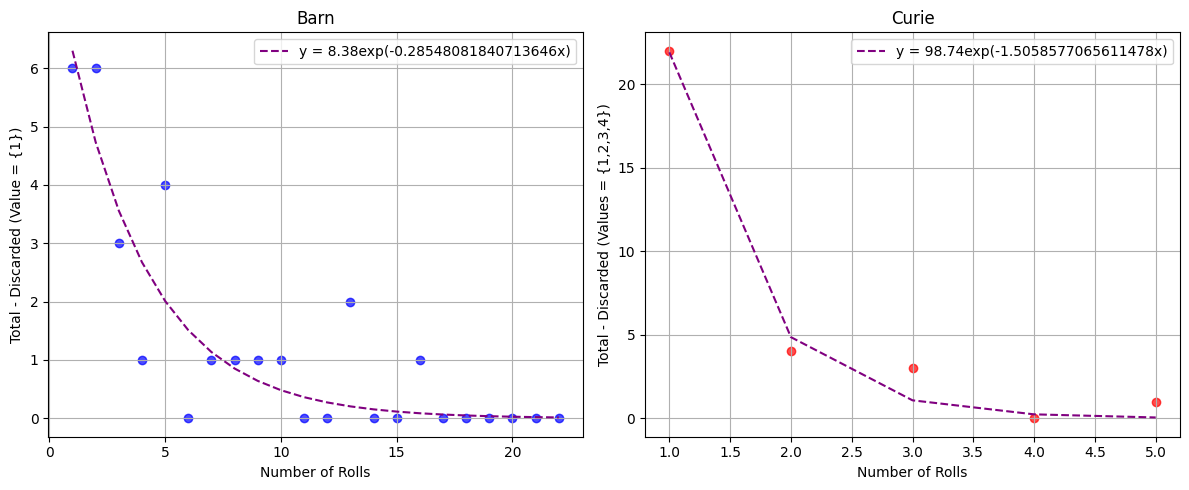

Decay constants for Barn: 0.29 ±0.05 inverse rolls and Curie: 1.51±0.26 inverse rolls
Percent Error in decay constant (Curie): 36.94%, Barn: 56.24%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf
import pandas as pd

# Generate some sample data using numpy for two scatter plots
x1 = np.linspace(1,22,22)
y1 = np.array([6,6,3,1,4,0,1,1,1,1,0,0,2,0,0,1,0,0,0,0,0,0])

x2 = np.linspace(1,5,5)
y2 = np.array([22, 4, 3, 0, 1])

# Generate a table for sample data
df1 = pd.DataFrame({'Number of Rolls': x1, 'Total - Discarded (Value = {1})': y1})
df2 = pd.DataFrame({'Number of Rolls': x2, 'Total - Discarded (Values = {1,2,3,4})': y2})
# Display tables

from IPython.display import display
display(df1)
display(df2)

def exponential_curve(x, a, b):
    return a * np.exp(b * x)
# Finding the best parameters, popt, and giving an initial guess, p0
popt1, pcov1 = cf(exponential_curve, x1, y1, p0=[1, 0.1])
aopt1, bopt1 = popt1 # Extracting optimized parameters

popt2, pcov2 = cf(exponential_curve, x2, y2, p0=[1, 0.1])
aopt2, bopt2 = popt2 # Extracting optimized parameters

# Generate the fitted curve using the optimized parameters

y1_fit = exponential_curve(x1, aopt1, bopt1)
y2_fit = exponential_curve(x2, aopt2, bopt2)
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns for side-by-side plots

# Plot the first scatter plot on the first subplot
axes[0].scatter(x1, y1, color='blue', alpha=0.7)
axes[0].plot(x1, y1_fit, color='purple', linestyle='--', label=f'y = {aopt1:.2f}exp({bopt1}x)')
axes[0].set_title('Barn')
axes[0].set_xlabel('Number of Rolls')
axes[0].set_ylabel('Total - Discarded (Value = {1})')
axes[0].grid(True)
axes[0].legend()

# Plot the second scatter plot on the second subplot
axes[1].scatter(x2, y2, color='red', alpha=0.7)
axes[1].plot(x2, y2_fit, color='purple', linestyle='--', label=f'y = {aopt2:.2f}exp({bopt2}x)')
axes[1].set_title('Curie')
axes[1].set_xlabel('Number of Rolls')
axes[1].set_ylabel('Total - Discarded (Values = {1,2,3,4})')
axes[1].grid(True)
axes[1].legend()

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

# Percent Error

"""Barn Theoretical Error: ~ 0.167
Curie Theoretical Error: ~0.667"""

p_error_c = np.abs((np.log(1-0.667) - bopt2) / np.log(1-0.667)) * 100
p_error_b = np.abs((np.log(1-0.167) - bopt1) / np.log(1-0.167)) * 100

# Error on the decay constant
error_bopt1 = np.sqrt(np.diag(pcov1))[1]
error_bopt2 = np.sqrt(np.diag(pcov2))[1]

print(f"Decay constants for Barn: {-bopt1:.2f} ±{error_bopt1:.2f} inverse rolls and Curie: {-bopt2:.2f}±{error_bopt2:.2f} inverse rolls")
print(f"Percent Error in decay constant (Curie): {p_error_c:.2f}%, Barn: {p_error_b:.2f}%")

### Discussion Part-1

As we can see with the percent error calculations of the experimental and theoretical decay constants, there is a large deviation from our predictions. This may in large be due to the residual data points present in the set. Below is some code to detect which points provided the most error for the numerical algorithm.

In [ ]:
residuals_barn1 = y1 - y1_fit
absolute_residuals_barn1 = np.abs(residuals_barn1)

# Get the indices of the top N largest residuals
num_top_points = 5
top_indices_barn1 = np.argsort(absolute_residuals_barn1)[-num_top_points:][::-1]

print(f"Top {num_top_points} data points contributing most to the error for Barn dataset (bopt1):\n")
for i in top_indices_barn1:
    print(f"X: {x1[i]:.2f}, Actual Y: {y1[i]}, Fitted Y: {y1_fit[i]:.2f}, Residual: {residuals_barn1[i]:.2f}")

Top 5 data points contributing most to the error for Barn dataset (bopt1):

X: 5.00, Actual Y: 4, Fitted Y: 2.01, Residual: 1.99
X: 13.00, Actual Y: 2, Fitted Y: 0.20, Residual: 1.80
X: 4.00, Actual Y: 1, Fitted Y: 2.67, Residual: -1.67
X: 6.00, Actual Y: 0, Fitted Y: 1.51, Residual: -1.51
X: 2.00, Actual Y: 6, Fitted Y: 4.73, Residual: 1.27


These residuals caused the numerical solver to, despite best efforts, fit an exponential curve far from the actual datapoints, as we can see in the graphs above. However, the value generated for the decay constant *bopt1* for Barn's data is close enough, despite the large percent error of 56.24%, to confirm the underlying decay process supporting this experiment. The same can thus be said about Curie's data.

### Experiment 2

This experiment uses a similar approach to experiment one with only one difference, Barn gives his discarded pile to Curie. This is to simulate a parent-daughter decay chain.

,Number of Rolls,"Total - Discarded (Value = {1,2,3,4})"
0,1.0,18
1,2.0,14
2,3.0,5
3,4.0,3
4,5.0,4
5,6.0,3
6,7.0,2
7,8.0,2
8,9.0,2
9,10.0,0


,Number of Rolls,Total - Discarded (Value = {1})
0,1.0,6
1,2.0,4
2,3.0,1
3,4.0,5
4,5.0,3
5,6.0,3
6,7.0,1
7,8.0,0
8,9.0,0
9,10.0,1


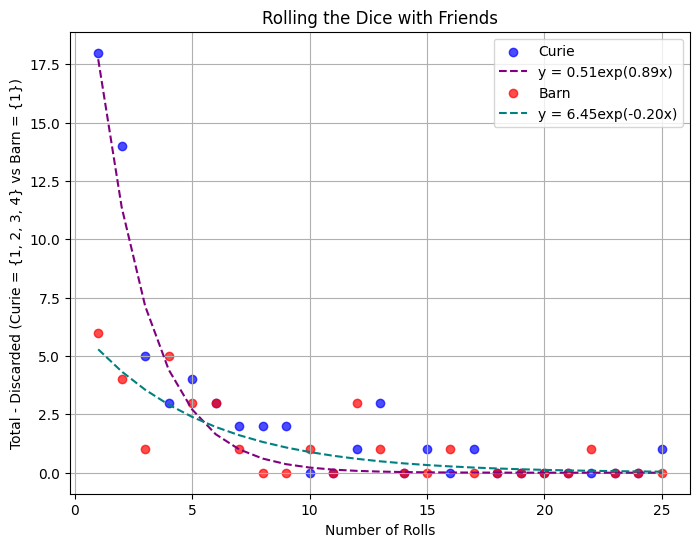

Decay constant for Curie: 0.89 ± 0.17 rolls inverse
Decay constant for Barn: 0.20 ± 0.04 rolls inverse
Percent error: Curie = 53.84%, Barn = 8.54%


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf
import pandas as pd

# Generate two sets of sample data for the new scatter plot
x_data_a = np.linspace(1,25,25) #Curie
y_data_a = np.array([18,14,5,3,4,3,2,2,2,0,0,1,3,0,1,0,1,0,0,0,0,0,0,0,1])

x_data_b = np.linspace(1,25,25) #Barn
y_data_b = np.array([6,4,1,5,3,3,1,0,0,1,0,3,1,0,0,1,0,0,0,0,0,1,0,0,0])

# Tables
df3 = pd.DataFrame({'Number of Rolls': x_data_a, 'Total - Discarded (Value = {1,2,3,4})': y_data_a})
df4 = pd.DataFrame({'Number of Rolls': x_data_b, 'Total - Discarded (Value = {1})': y_data_b})
# Display tables

from IPython.display import display
display(df3)
display(df4)

# Exponential Fit
poptb2, pcovb2 = cf(exponential_curve, x_data_b, y_data_b, p0=[1, 0.5])
aoptb2, boptb2 = poptb2
y_fit_b = exponential_curve(x_data_b, aoptb2, boptb2)

# Bateman Equations for Curie
# Updated Bateman function for Activity
def bateman_activity(t, lam_B, lam_C):
    # Initial dice
    Nb0, Nc0 = 30, 30
    # The Bateman Population (Nc)
    # Added a tiny epsilon (1e-9) to prevent division by zero if lam_B == lam_C
    denom = (lam_C - lam_B) if lam_C != lam_B else 1e-9
    population = Nc0 * np.exp(-lam_C * t) + (lam_B * Nb0 / denom) * (np.exp(-lam_B * t) - np.exp(-lam_C * t))
    # Return Discarded Dice (Activity = lambda * Population)
    return lam_C * population

# Using Bounds to force a decay (lambda must be between 0 and infinity)
# bounds=( [lower_B, lower_C], [upper_B, upper_C] )
popta1, pcova1 = cf(bateman_activity, x_data_a, y_data_a,
                    p0=[0.18, 1.1],
                    bounds=(0, np.inf))

# Plotting the result
y_fit_a = bateman_activity(x_data_a, *popta1)
aopta1, bopta1 = popta1

# Create a new figure and a single subplot for this additional plot
plt.figure(figsize=(8, 6))

# Plot the first set of data
plt.scatter(x_data_a, y_data_a, color='blue', alpha=0.7, label='Curie')
plt.plot(x_data_a, y_fit_a, label=f'y = {aopta1:.2f}exp({bopta1:.2f}x)', color='purple', linestyle='--')

# Plot the second set of data
plt.scatter(x_data_b, y_data_b, color='red', alpha=0.7, label='Barn')
plt.plot(x_data_b, y_fit_b, label=f'y = {aoptb2:.2f}exp({boptb2:.2f}x)', color='teal', linestyle='--')

plt.title('Rolling the Dice with Friends')
plt.xlabel('Number of Rolls')
plt.ylabel('Total - Discarded (Curie = {1, 2, 3, 4} vs Barn = {1})')
plt.grid(True)
plt.legend() # Display the legend based on the 'label' arguments in scatter()

# Display the plot
plt.show()

# Error on the decay constant
error_bopta1 = np.sqrt(np.diag(pcova1))[1]
error_boptb2 = np.sqrt(np.diag(pcovb2))[1]

# Error on the decay constants
# For Curie, popta1 = [lam_B, lam_C]. So index 1 is Curie's decay constant.
error_lam_C = np.sqrt(np.diag(pcova1))[1]
error_b_Barn = np.sqrt(np.diag(pcovb2))[1]

# Theoretical Constants (Absolute values)
theo_lam_C = np.abs(np.log(1 - 0.667))
theo_lam_B = np.abs(np.log(1 - 0.167))

# Percent error using absolute values
perror_c2 = np.abs((theo_lam_C - aopta1) / theo_lam_C) * 100 # Note: popta1[0] is lam_B, popta1[1] is lam_C
perror_b2 = np.abs((theo_lam_B - np.abs(boptb2)) / theo_lam_B) * 100

print(f"Decay constant for Curie: {bopta1:.2f} ± {error_lam_C:.2f} rolls inverse")
print(f"Decay constant for Barn: {np.abs(boptb2):.2f} ± {error_b_Barn:.2f} rolls inverse")
print(f"Percent error: Curie = {perror_c2:.2f}%, Barn = {perror_b2:.2f}%")

### Discussion Part-2

Several points come up that are worthy of note. When we look at the Barn data, we expected to see no significant changes in the results. In fact, to compare Barn's results in both experiment one and two, experiment two yielded much better results for the die tosses. 8.54% compared to 56.24%. This is a good example of the randomness of the dice throws in the experiment and should be considered for future projects.

When looking at the high error in Curie's data we can attribute this to how in both experiments the dice throws in Curie's are aggressive outliers. With how quickly the data tends to zero we cannot fit a line without aggressive residuals. Below are the calculated residuals for Curie's data.

In [ ]:
residuals_a = y_data_a - y_fit_a
absolute_residuals_a = np.abs(residuals_a)

# Get the indices of the top N largest residuals
num_top_points = 5
top_indices_a = np.argsort(absolute_residuals_a)[-num_top_points:][::-1]

print(f"Top {num_top_points} data points contributing most to the error for Curie dataset (bopta1):\n")
for i in top_indices_a:
    print(f"X: {x_data_a[i]:.2f}, Actual Y: {y_data_a[i]}, Fitted Y: {y_fit_a[i]:.2f}, Residual: {residuals_a[i]:.2f}")

Top 5 data points contributing most to the error for Curie dataset (bopta1):

X: 13.00, Actual Y: 3, Fitted Y: 0.05, Residual: 2.95
X: 2.00, Actual Y: 14, Fitted Y: 11.38, Residual: 2.62
X: 3.00, Actual Y: 5, Fitted Y: 7.14, Residual: -2.14
X: 9.00, Actual Y: 2, Fitted Y: 0.37, Residual: 1.63
X: 4.00, Actual Y: 3, Fitted Y: 4.42, Residual: -1.42


While we the residuals are rather large the trendline still leans towards exponential decay which qualitatively verifies the experiment.

To be sure, rather than using a standard exponential fitting curve, we refered to the Bateman equations to account for the gain in dice. Though the percent error is high, this is in part due to how minimal the gain in dice is to loss. This is not due to human error and has everything to do to the physics of the dice.

,Time (min.),Net Count Rate
0,2.5,815
1,5.5,930
2,8.5,770
3,11.5,860
4,14.5,680
5,17.5,730
6,20.5,690
7,23.5,760
8,26.5,580
9,29.5,770


,Time (min.),Net Count Rate
0,160,3310
1,370,3110
2,580,3030
3,610,3000
4,810,2980
5,1000,3120
6,1200,2900
7,1360,3070
8,1550,2810
9,1705,2810


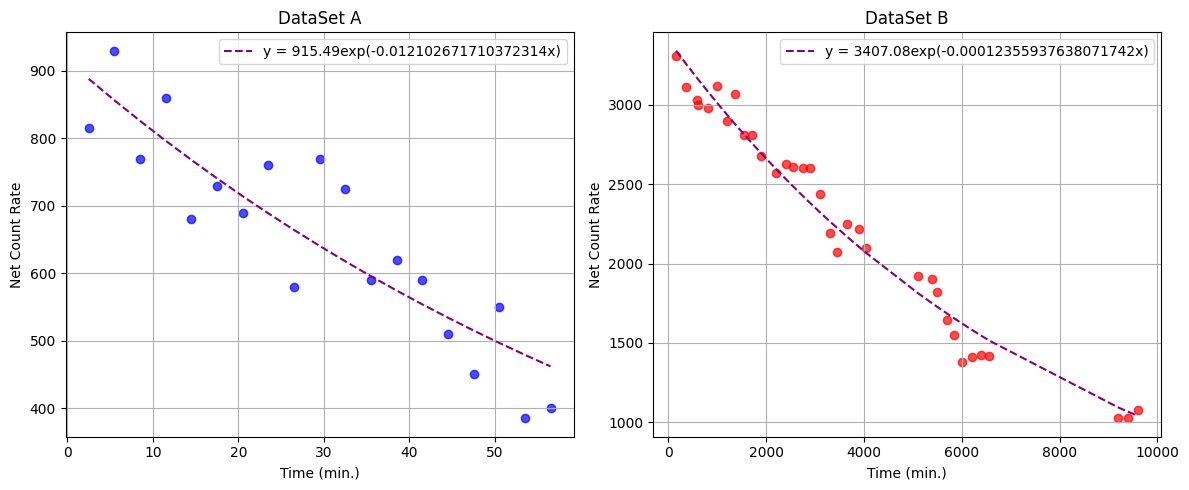

Half-Life of set A: 57.27 minutes.
Half-Life of set B: 5609.83 minutes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf

# Generate some sample data using numpy for two scatter plots
xa = np.array([2.5,5.5,8.5,11.5,14.5,17.5,20.5,23.5,26.5,29.5,32.5,35.5,38.5,41.5,44.5,47.5,50.5,53.5,56.5])
ya = np.array([815,930,770,860,680,730,690,760,580,770,725,590,620,590,510,450,550,385,400])

xb = np.array([160,370,580,610,810,1000,1200,1360,1550,1705,1900,2200,2400,2550,2750,2900,3100,3300,3450,3650,3890,4050,5100,5400,5500,5700,5850,6010,6200,6400,6550,9200,9400,9600])
yb = np.array([3310,3110,3030,3000,2980,3120,2900,3070,2810,2810,2680,2570,2630,2605,2600,2600,2440,2195,2075,2250,2220,2100,1920,1900,1820,1645,1550,1380,1410,1425,1420,1030,1025,1080])

df5 = pd.DataFrame({'Time (min.)': xa, 'Net Count Rate': ya})
df6 = pd.DataFrame({'Time (min.)': xb, 'Net Count Rate': yb})

from IPython.display import display
display(df5)
display(df6)

def exponential_curve(x, a, b):
    return a * np.exp(b * x)
# Finding the best parameters, popt, and giving an initial guess, p0
popta, pcova = cf(exponential_curve, xa, ya, p0=[900, -0.013])
aopta, bopta = popta # Extracting optimized parameters

poptb, pcovb = cf(exponential_curve, xb, yb, p0=[3300, -0.0001])
aoptb, boptb = poptb # Extracting optimized parameters

# Generate the fitted curve using the optimized parameters

ya_fit = exponential_curve(xa, aopta, bopta)
yb_fit = exponential_curve(xb, aoptb, boptb)
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns for side-by-side plots

# Plot the first scatter plot on the first subplot
axes[0].scatter(xa, ya, color='blue', alpha=0.7)
axes[0].plot(xa, ya_fit, color='purple', linestyle='--', label=f'y = {aopta:.2f}exp({bopta}x)')
axes[0].set_title('DataSet A')
axes[0].set_xlabel('Time (min.)')
axes[0].set_ylabel('Net Count Rate')
axes[0].grid(True)
axes[0].legend()

# Plot the second scatter plot on the second subplot
axes[1].scatter(xb, yb, color='red', alpha=0.7)
axes[1].plot(xb, yb_fit, color='purple', linestyle='--', label=f'y = {aoptb:.2f}exp({boptb}x)')
axes[1].set_title('DataSet B')
axes[1].set_xlabel('Time (min.)')
axes[1].set_ylabel('Net Count Rate')
axes[1].grid(True)
axes[1].legend()

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

# Half-Life DataSet A
half_life_a = -np.log(2) / bopta
print(f"Half-Life of set A: {half_life_a:.2f} minutes.")
#Half-Life DataSet B
half_life_b = -np.log(2) / boptb
print(f"Half-Life of set B: {half_life_b:.2f} minutes.")

### Discussion Part-3

Data set A could be Bi-214, but due to the grouping in the scatterplot the error on the half-life remains quite large. Set B has a better chance to be Rn-222. It's grouping is much tighter requiring less guess work in the math.

### Conclusion

Overall, the experiment was a success, verifying that discrete trials can be analyzed continuously to achieve an understanding of radioactive decay.

### References

Krane KS. Introductory Nuclear Physics. New York, NY: John Wiley & Sons; 1987:173.